## KNN en Python

A continuación veremos cómo podemos implementar este modelo en Python. Para ello, utilizaremos la librería `scikit-learn`.

### KNN para clasificación

Para ejemplificar la implementación de un KNN para clasificación utilizaremos un conjunto de datos con pocas instancias y que ya ha sido previamente tratado con un EDA completo.

#### Paso 1. Lectura del conjunto de datos procesado

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y = True, as_frame = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [2]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


El conjunto train lo utilizaremos para entrenar el modelo, mientras que con el test lo evaluaremos para medir su grado de efectividad. 

Para asegurar el correcto funcionamiento de este modelo y evitar errores, la estandarización de los datos es necesaria ya que si las características no están en la misma escala, aquellas con magnitudes más grandes pueden dominar la distancia y afectar el resultado del algoritmo.

Por ejemplo, si tenemos dos características: la edad (con valores entre 0 y 100) y el ingreso anual (con valores entre 0 y 100.000), la diferencia de escala entre ambas variables podría hacer que el ingreso anual tenga un impacto desproporcionado en la distancia ignorando la importancia de la edad.

Estandarizar los datos ayuda a que todas las características contribuyan de manera equitativa a la distancia, lo que puede mejorar el rendimiento del algoritmo KNN.

In [65]:
import plotly.express as px

X_plot = X.copy()
X_plot["species"] = y
d = {0: "setosa", 1: "versicolor", 2: "virginica"}
X_plot["species"] = X_plot["species"].map(d)

fig = px.scatter_3d(X_plot, x = "petal width (cm)", y = "petal length (cm)", z = "sepal width (cm)",
              color = "species", width = 1000, height = 500, size = "petal length (cm)")
camera = dict(
    eye = dict(x = 1.8, y = 0.5, z = 0.5)
)

fig.update_layout(scene_camera=camera)
fig.show()

Siendo la clase `0` una `iris setosa`, la `1` una `iris verisocolor` y la `2` una `iris virginica`, podemos apreciar cómo se reparten los valores de las predictoras en las distintas clases de flor. Este puede ser un buen gráfico a incluir en nuestros análisis EDA a partir de ahora, ya que nos ayuda a identificar patrones y correlaciones entre las variables.

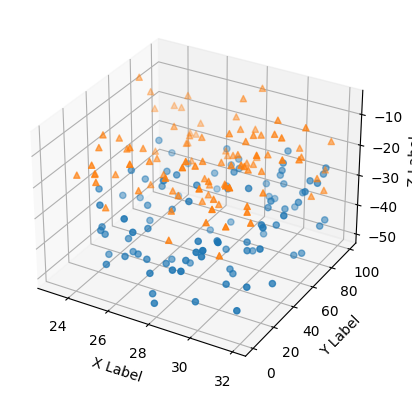

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin


n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

#### Paso 2: Inicialización y entrenamiento del modelo

In [3]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Una vez que el modelo ha entrenado correctamente, podemos visualizar el árbol con la misma librería. Esta visualización compone todos los pasos que ha seguido el modelo hasta la construcción del árbol. Además, se hace por niveles y de izquierda a derecha:

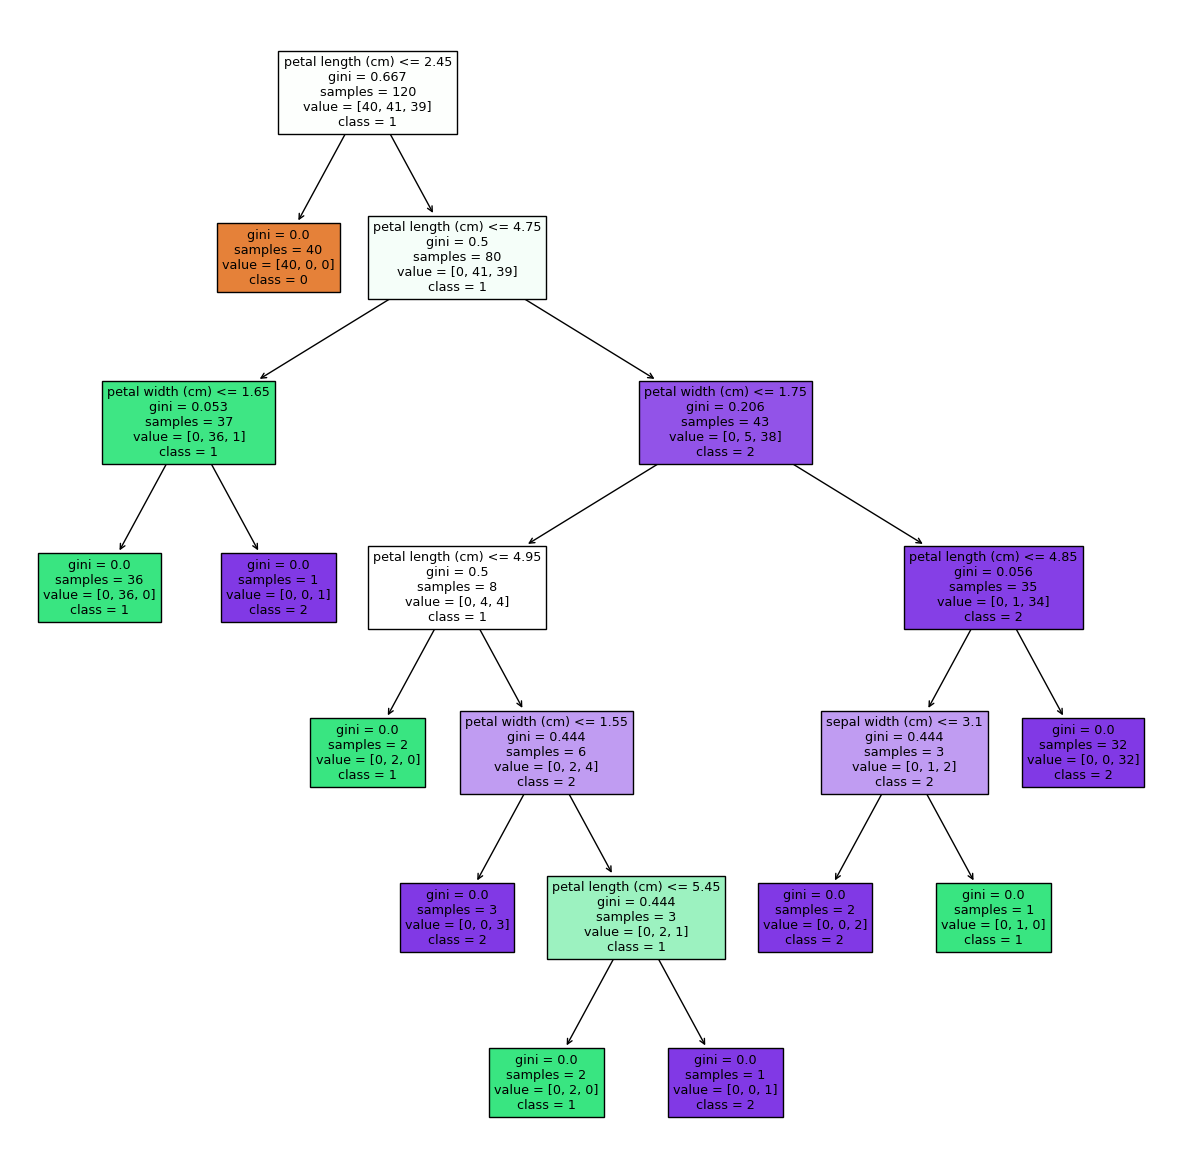

In [4]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

El tiempo de entrenamiento de un modelo dependerá, en primer lugar, del tamaño del conjunto de datos (instancias y características), y también de la tipología de modelo y su configuración.

#### Paso 3: Predicción del modelo

Una vez se ha entrenado el modelo, se puede utilizar para predecir con el conjunto de datos de prueba.

In [5]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

Con los datos en crudo es muy complicado saber si el modelo está acertando o no. Para ello, debemos compararlo con la realidad. Existe una gran cantidad de métricas para medir la efectividad de un modelo a la hora de predecir, entre ellas la **precisión** (*accuracy*), que es la fracción de predicciones que el modelo realizó correctamente.

In [6]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

El modelo es perfecto!

#### Paso 4: Guardado del modelo

Una vez tenemos el modelo que estábamos buscando (presumiblemente tras la optimización de hiperparámetros), para poder utilizarlo a futuro es necesario almacenarlo en nuestro directorio, junto a la semilla.

In [7]:
from pickle import dump

dump(model, open("decision_tree_classifier_default_42.sav", "wb"))

Añadir un nombre explicativo al modelo es vital, ya que en el caso de perder el código que lo ha generado sabremos, por un lado, qué configuración tiene (en este caso decimos `default` porque no hemos personalizado ninguno de los hiperparámetros del modelo, hemos dejado los que tiene por defecto la función) y además la semilla para replicar los componentes aleatorios del modelo, que en este caso lo hacemos añadiendo un número al nombre del archivo, el `42`.

### Árboles de decisión para regresión

Para ejemplificar la implementación de un árbol de regresión utilizaremos un conjunto de datos con pocas instancias y que ya ha sido previamente tratado con un EDA completo.

#### Paso 1. Lectura del conjunto de datos procesado

In [8]:
train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_petrol_consumption_train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_petrol_consumption_test.csv")

train_data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,8.0,4447,8577,0.529,464
1,7.5,4870,2351,0.529,414
2,8.0,5319,11868,0.451,344
3,7.0,4345,3905,0.672,968
4,7.5,3357,4121,0.547,628


El conjunto train lo utilizaremos para entrenar el modelo, mientras que con el test lo evaluaremos para medir su grado de efectividad. Dividiremos también las predictoras de las características.

In [9]:
X_train = train_data.drop(["Petrol_Consumption"], axis = 1)
y_train = train_data["Petrol_Consumption"]
X_test = test_data.drop(["Petrol_Consumption"], axis = 1)
y_test = test_data["Petrol_Consumption"]

#### Paso 2: Inicialización y entrenamiento del modelo

In [10]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

#### Paso 3: Predicción del modelo

Una vez se ha entrenado el modelo, se puede utilizar para predecir con el conjunto de datos de prueba.

In [11]:
y_pred = model.predict(X_test)
y_pred

array([603., 632., 580., 714., 510., 644., 414., 968., 580., 541.])

Para calcular la efectividad del modelo utilizaremos el **error cuadrático medio** (*MSE*):

In [12]:
from sklearn.metrics import mean_squared_error

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")

Error cuadrático medio: 17347.7


#### Paso 4: Guardado del modelo

Una vez tenemos el modelo que estábamos buscando (presumiblemente tras la optimización de hiperparámetros), para poder utilizarlo a futuro es necesario almacenarlo en nuestro directorio, junto a la semilla.

In [13]:
dump(model, open("decision_tree_regressor_default_42.sav", "wb"))

Añadir un nombre explicativo al modelo es vital, ya que en el caso de perder el código que lo ha generado sabremos, por un lado, qué configuración tiene (en este caso decimos `default` porque no hemos personalizado ninguno de los hiperparámetros del modelo, hemos dejado los que tiene por defecto la función) y además la semilla para replicar los componentes aleatorios del modelo, que en este caso lo hacemos añadiendo un número al nombre del archivo, el `42`.